1952.txt
mycount: 
13
proportion 
after my 
beloved
after my 
people
after my 
own
after my 
family
after my 
affectionate
after my 
grandfather
after my 
accession
after my 
first
after my 
heart
after my 
Coronation
after my 
life
poscount: 
15
1953.txt
mycount: 
10
proportion 
after my 
voyage
after my 
reign
after my 
great
after my 
life
after my 
peoples
after my 
people
after my 
husband
poscount: 
10
1954.txt
mycount: 
4
proportion 
after my 
husband
after my 
own
after my 
life
after my 
people
poscount: 
4
1955.txt
mycount: 
4
proportion 
after my 
husband
after my 
people
after my 
peoples
poscount: 
4
1956.txt
mycount: 
7
proportion 
after my 
children
after my 
husband
after my 
husband
after my 
own
after my 
husband
after my 
own
after my 
heartfelt
poscount: 
7
1957.txt
mycount: 
9
proportion 
after my 
grandfather
after my 
Christmas
after my 
own
after my 
heart
after my 
Canadian
after my 
husband
after my 
heart
after my 
devotion
poscount: 
9
1958.txt
mycount: 
14


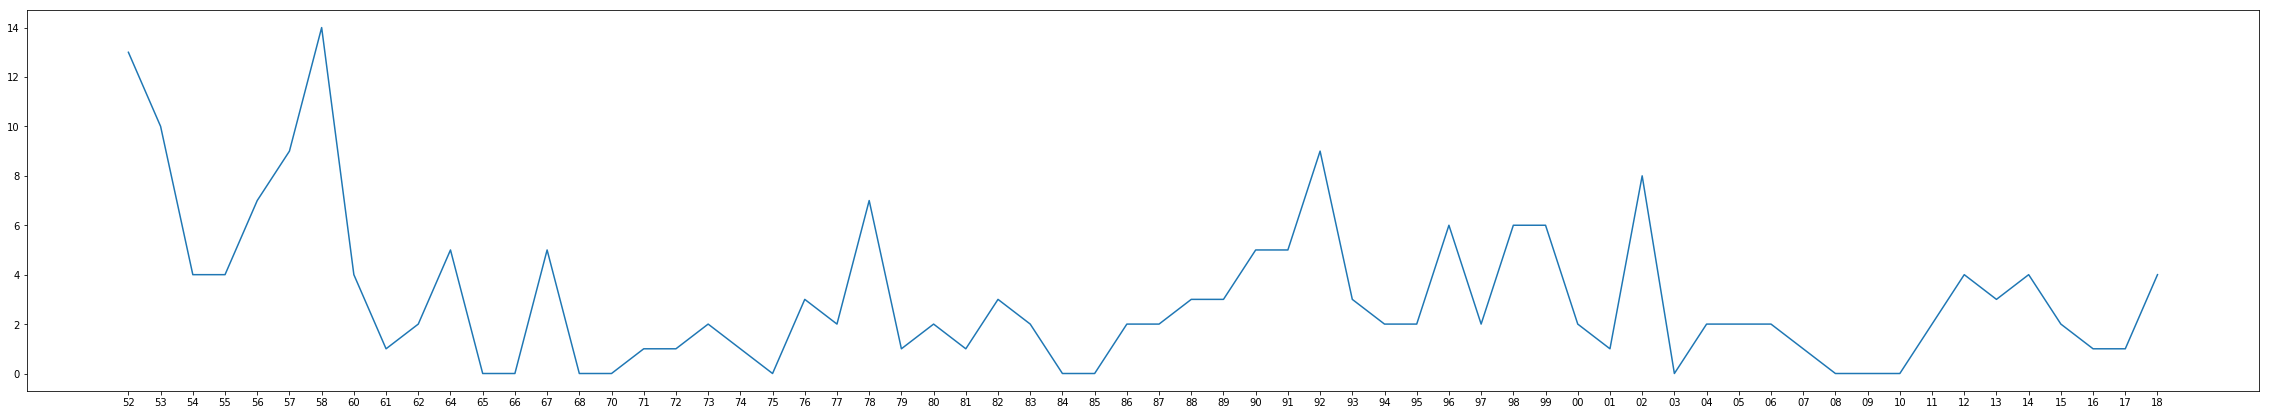

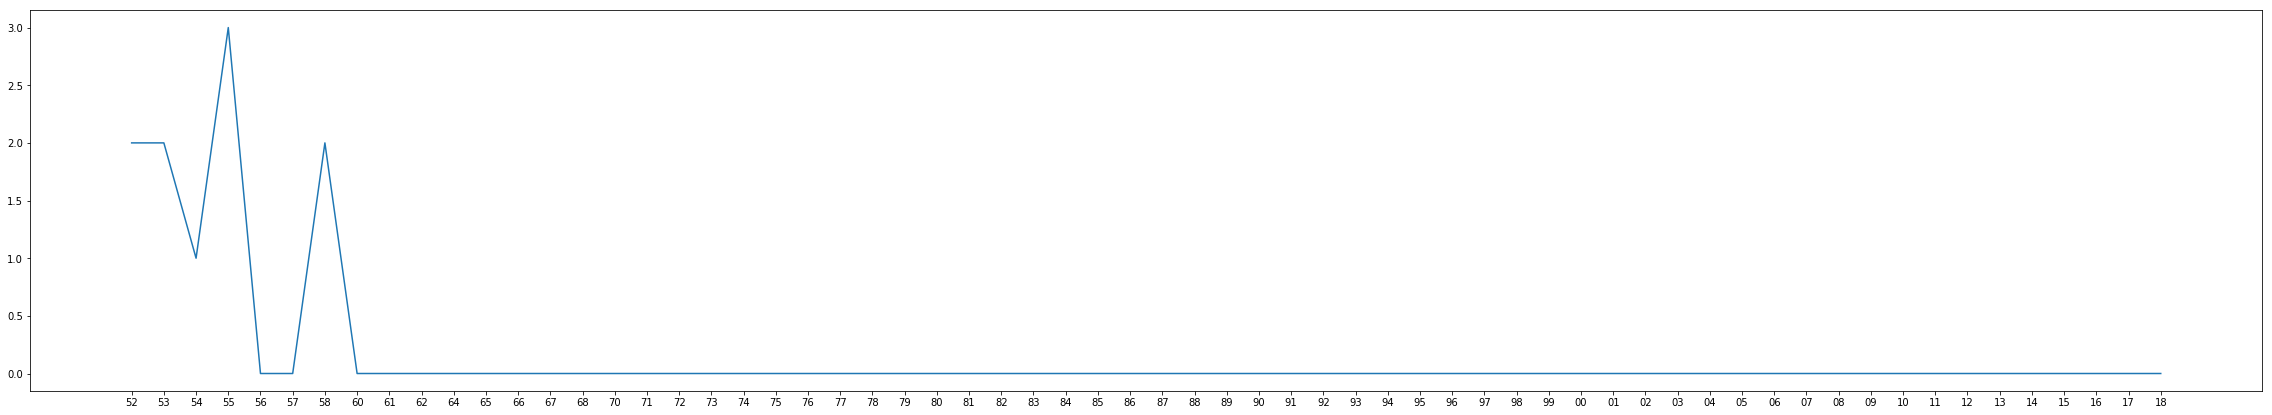

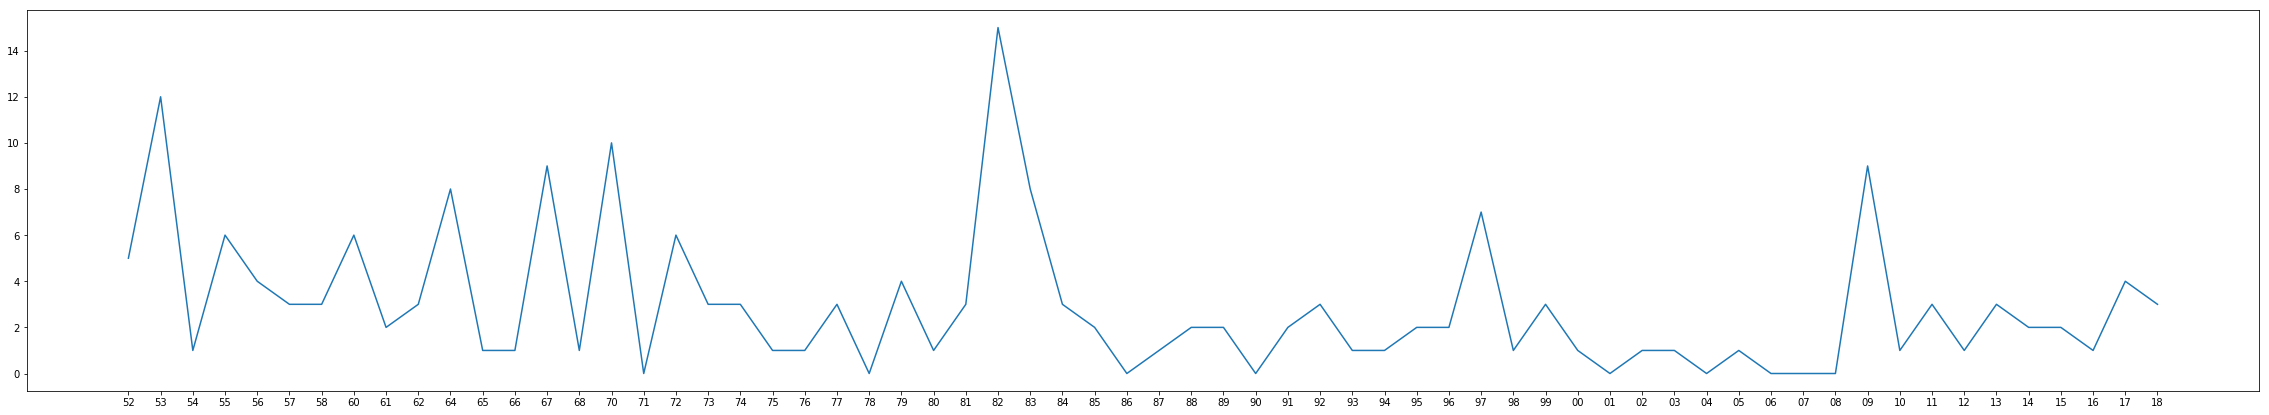

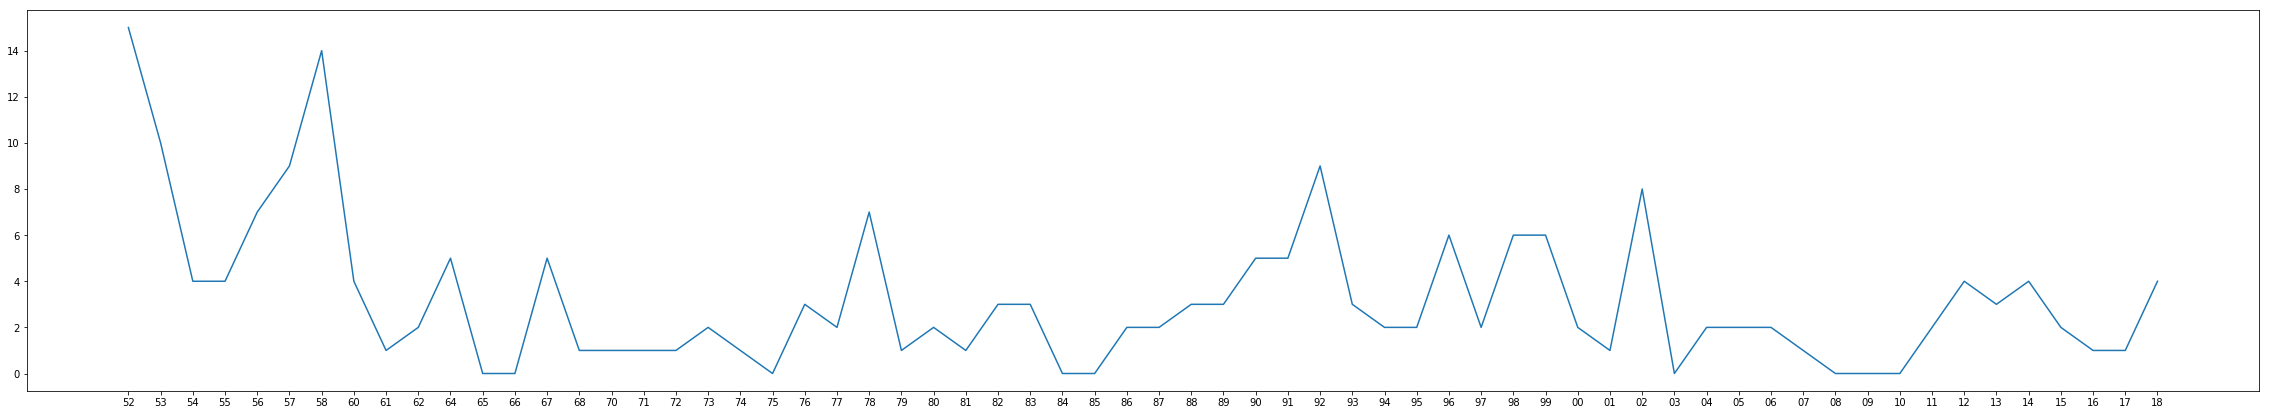

In [5]:
import nltk
import os
import sys
import matplotlib.pyplot as plt
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.probability import FreqDist

def posession_count(text):
    
    fdist = FreqDist(text)
    list_version = fdist.most_common(len(fdist))

   
    poscount = 0

    for words in list_version:   
        if words[0] == 'my' or words[0] == 'My' or \
        words[0] == 'mine' or words[0] == 'belong' \
        or words[0] == 'belongs':
            poscount += words[1]

   
    print('poscount: '),
    print(poscount)
    #proportion = ((mycount/(inclusive_count+mycount))*100)
    #print('length'), 
    #print (len(text))
    #print(proportion)
    return poscount

def pronoun_count(text):
    
    fdist = FreqDist(text)
    list_version = fdist.most_common(len(fdist))

   
    mycount = 0

    for words in list_version:   
        if words[0] == 'my' or words[0] == 'My' or \
        words[0] == 'mine':
            mycount += words[1]

   
    print('mycount: '),
    print(mycount)
    #proportion = ((mycount/(inclusive_count+mycount))*100)
    #print('length'), 
    #print (len(text))
    print('proportion ')
    #print(proportion)
    return mycount

def my_people_count(text):
    
    mypeople_count = 0
       
    for word, nextword in zip(text, text[1:]):
        if word == 'my':
            print ('after my '),
            print(nextword)        
        if word == 'my' or word == 'his':
            if nextword == 'peoples' or nextword == 'people':
                mypeople_count += 1
       
    return mypeople_count


def empire_count(text):
    
    empire_count = 0
       
    for word in text:
        if word == 'commonwealth' or word == 'Commonwealth' or word == 'Empire' or word == 'crown' or word == 'Crown':
            empire_count += 1
       
    return empire_count

def main():
    file_name = sys.argv[1]
    newcorpus = PlaintextCorpusReader('data', '.*')
    files = newcorpus.fileids()
    mycount_list = []
    mypeople_count = []
    empire_cnt = []
    pos_cnt = []
    
    numbers = ['52', '53', '54', '55', '56', '57', '58', '60', '61', '62', '64', '65', '66', '67', '68', '70', '71', '72',
     '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
     '91', '92', '93', '94', '95', '96', '97', '98', '99', '00', '01', '02', '03', '04', '05', '06', '07', '08',
     '09', '10', '11', '12', '13', '14', '15', '16', '17', '18']

    for f in files:
        print(f)
        mycount_list.append(pronoun_count(newcorpus.words(f)))
        mypeople_count.append(my_people_count(newcorpus.words(f)))
        empire_cnt.append(empire_count(newcorpus.words(f)))
        pos_cnt.append(posession_count(newcorpus.words(f)))
        
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 40
        fig_size[1] = 7
        plt.rcParams["figure.figsize"] = fig_size
       
    plt.plot(numbers, mycount_list)
    plt.show()
    plt.plot(numbers, mypeople_count)
    plt.show()
    plt.plot(numbers, empire_cnt)
    plt.show()
    plt.plot(numbers, pos_cnt)

if __name__ == "__main__":
    main()
